In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow import keras
# importing Sequential from keras
from tensorflow.keras.models import Sequential
#importing Dense and Conv2D layers from keras
from tensorflow.keras.layers import Dense,Conv2D

In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCHS = 30

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"base_input" , shuffle = True , 
    image_size =(IMAGE_SIZE ,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 9000 files belonging to 2 classes.


In [6]:
class_names = dataset.class_names
class_names

['Tomato__Healthy', 'Tomato__Unhealthy']

In [7]:
for image_batch, label_batch in dataset:
   # print(image_batch.shape)
    train_df = image_batch.numpy().astype('uint8')
    
    train_label = label_batch.numpy()
 

In [8]:
print(train_df)
  

[[[[226 221 217]
   [228 223 219]
   [229 224 220]
   ...
   [230 222 219]
   [231 223 220]
   [233 225 222]]

  [[226 221 217]
   [226 221 217]
   [225 220 216]
   ...
   [223 215 212]
   [226 218 215]
   [229 221 218]]

  [[228 223 219]
   [226 221 217]
   [224 219 215]
   ...
   [223 215 212]
   [226 218 215]
   [229 221 218]]

  ...

  [[178 167 161]
   [182 171 165]
   [174 163 157]
   ...
   [171 160 154]
   [174 163 157]
   [182 171 165]]

  [[176 165 159]
   [182 171 165]
   [171 160 154]
   ...
   [161 150 144]
   [165 154 148]
   [172 161 155]]

  [[181 170 164]
   [188 177 171]
   [174 163 157]
   ...
   [180 169 163]
   [163 152 146]
   [181 170 164]]]


 [[[138 126 136]
   [100  88  98]
   [122 110 120]
   ...
   [154 144 153]
   [150 140 149]
   [152 142 151]]

  [[120 108 118]
   [ 99  87  97]
   [123 111 121]
   ...
   [153 143 152]
   [152 142 151]
   [156 146 155]]

  [[130 118 128]
   [124 112 122]
   [138 126 136]
   ...
   [148 138 147]
   [150 140 149]
   [157 147

In [9]:
print(train_label)

[1 1 1 1 1 1 0 1]


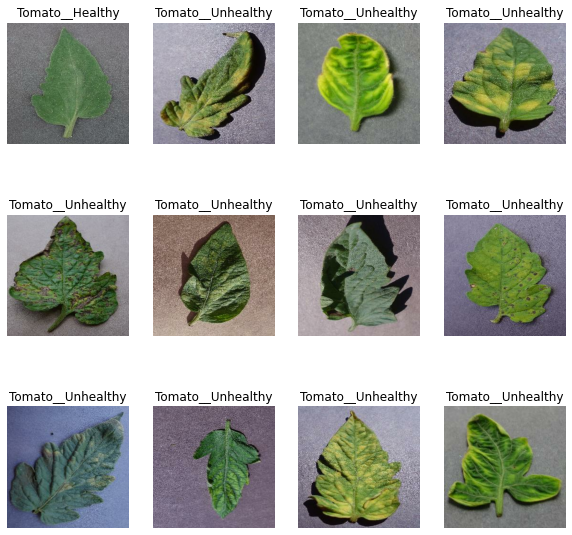

In [10]:
plt.figure(figsize =(10,10))

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [11]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split =0.1 , test_split=0.1, shuffle = True,shuffle_size =10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split *ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds , val_ds, test_ds

In [12]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [13]:
len(train_ds)

225

In [14]:
len(val_ds)

28

In [15]:
len(test_ds)

29

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [17]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [18]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
 ])

In [19]:
def build_model(hp):
    # create model object
    model = keras.Sequential([
    #adding first convolutional layer    
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_1_filter', min_value=16, max_value= 96, step=8 ),
        # adding filter size or kernel size
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5,7]),
        #activation function
        activation='relu',
        input_shape=(256,256,3),
    ),
    keras.layers.MaxPooling2D((2,2)),
  
    # adding second convolutional layer 
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value= 32, max_value= 160, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu',
   
    ),
      keras.layers.MaxPooling2D((2,2)),
  
       keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_3_filter', min_value=32, max_value= 256, step= 32),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),
        #activation function
        activation='relu',
   
    ),
      keras.layers.MaxPooling2D((2,2)),
  
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_4_filter', min_value=64 , max_value = 314, step=32),
        # adding filter size or kernel size
        kernel_size=hp.Choice('conv_4_kernel', values = [3,5]),
        #activation function
        activation='relu',
        input_shape=(256,256,3),
    ),
      keras.layers.MaxPooling2D((2,2)),
    # adding flatten layer    
    keras.layers.Flatten(),
    # adding dense layer    
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value= 100 , max_value= 300 , step= 50),
        activation='relu'
    ),
    # output layer    
    keras.layers.Dense(2, activation='sigmoid')
    ])
    #compilation of model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [20]:
#importing random search
from keras_tuner import RandomSearch
#creating randomsearch object
tuner = RandomSearch(build_model,
                    objective='val_accuracy',
                    overwrite = 'true',
                    max_trials = 4)
# search best parameter

In [21]:
tuner.search(train_ds,epochs=4,validation_data=val_ds)

Trial 4 Complete [00h 58m 44s]
val_accuracy: 0.9040178656578064

Best val_accuracy So Far: 0.9899553656578064
Total elapsed time: 03h 28m 27s
INFO:tensorflow:Oracle triggered exit


In [22]:
tuner.get_best_hyperparameters()[0].values

{'conv_1_filter': 48,
 'conv_1_kernel': 3,
 'conv_2_filter': 80,
 'conv_2_kernel': 5,
 'conv_3_filter': 128,
 'conv_3_kernel': 5,
 'conv_4_filter': 288,
 'conv_4_kernel': 3,
 'dense_1_units': 150,
 'learning_rate': 0.001}

In [23]:
model=tuner.get_best_models(num_models=1)[0]
#summary of best model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 48)      1344      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 48)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 123, 123, 80)      96080     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 80)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 128)       256128    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [24]:
#some changes for optimal number of epochs

from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor = 'val_loss', mode ='min' , patience = 5 , restore_best_weights=True)

history = model.fit(
    train_ds,
    epochs = 30,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds,
    callbacks = [earlystopping]

)

Epoch 1/30
225/225 [==============================] - 674s 3s/step - loss: 0.0542 - accuracy: 0.9805 - val_loss: 0.0293 - val_accuracy: 0.9911
Epoch 2/30
225/225 [==============================] - 667s 3s/step - loss: 0.0498 - accuracy: 0.9822 - val_loss: 0.0305 - val_accuracy: 0.9900
Epoch 3/30
225/225 [==============================] - 669s 3s/step - loss: 0.0370 - accuracy: 0.9866 - val_loss: 0.0261 - val_accuracy: 0.9922
Epoch 4/30
225/225 [==============================] - 842s 4s/step - loss: 0.0339 - accuracy: 0.9870 - val_loss: 0.0234 - val_accuracy: 0.9933
Epoch 5/30
225/225 [==============================] - 667s 3s/step - loss: 0.0329 - accuracy: 0.9883 - val_loss: 0.0250 - val_accuracy: 0.9900
Epoch 6/30
225/225 [==============================] - 675s 3s/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0207 - val_accuracy: 0.9933
Epoch 7/30
225/225 [==============================] - 683s 3s/step - loss: 0.0240 - accuracy: 0.9918 - val_loss: 0.0242 - val_accuracy: 0.9933

In [25]:
scores = model.evaluate(test_ds)

29/29 [==============================] - 31s 840ms/step - loss: 0.0155 - accuracy: 0.9946


In [26]:
scores

[0.01549114752560854, 0.9946120977401733]

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

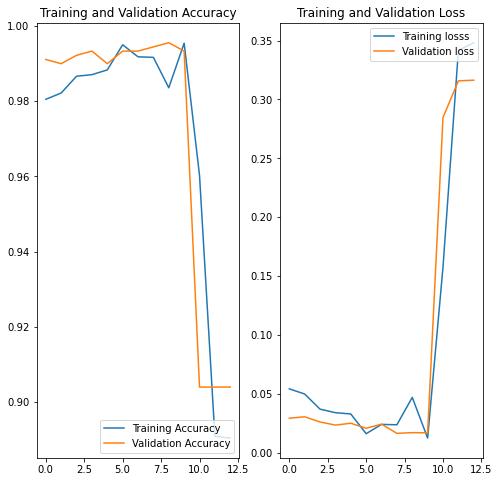

In [29]:
EPOCHS = 13
plt.figure(figsize =(16,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc , label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc , label ='Validation Accuracy')
plt.legend(loc ='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS ), loss, label ='Training losss')
plt.plot(range(EPOCHS), val_loss , label ='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual lable: Tomato__Unhealthy
Predicted lable : Tomato__Unhealthy


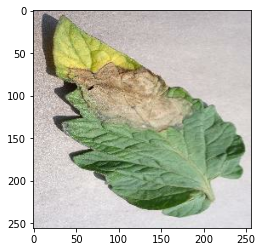

In [30]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual lable:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    predict_class =  class_names[np.argmax(batch_prediction[0])]
    
    print("Predicted lable :",predict_class)
   

In [31]:
import os
model_version=max([int(i) for i in os.listdir("C:/Users/ARADHANA/Documents/hyper_models") + [0]])+1
model.save(f"C:/Users/ARADHANA/Documents/hyper_models/{model_version}")

INFO:tensorflow:Assets written to: C:/Users/ARADHANA/Documents/hyper_models/2\assets


In [32]:
model.save("C:/Users/ARADHANA/Documents/tomato_model_corr.h5")